In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Step-1: Read the data set**

    1. Sample code number: id number 
    2. Clump Thickness: 1 - 10 
    3. Uniformity of Cell Size: 1 - 10 
    4. Uniformity of Cell Shape: 1 - 10 
    5. Marginal Adhesion: 1 - 10 
    6. Single Epithelial Cell Size: 1 - 10 
    7. Bare Nuclei: 1 - 10 
    8. Bland Chromatin: 1 - 10 
    9. Normal Nucleoli: 1 - 10 
    10. Mitoses: 1 - 10 
    11. Class: (2 for benign, 4 for malignant)


In [2]:
columns = ['idnumber','clumpthick','unicellsize','unicellshape','adhesion','epithelcellsize',
          'barenuclei','chromatin','normnucle','mitoses','type']

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.data')
data.columns = columns
data.head()

,idnumber,clumpthick,unicellsize,unicellshape,adhesion,epithelcellsize,barenuclei,chromatin,normnucle,mitoses,type
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
data.drop('idnumber',axis=1,inplace=True)
data.head()

,clumpthick,unicellsize,unicellshape,adhesion,epithelcellsize,barenuclei,chromatin,normnucle,mitoses,type
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


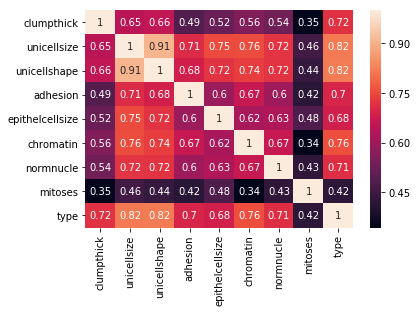

In [5]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [6]:
data.keys()

Index(['clumpthick', 'unicellsize', 'unicellshape', 'adhesion',
       'epithelcellsize', 'barenuclei', 'chromatin', 'normnucle', 'mitoses',
       'type'],
      dtype='object')

In [7]:
# Clump Thickness,  Uniformity of Cell Size
df = data[['clumpthick','unicellshape','type']]
df['type'].replace(to_replace=[2,4],value=[0,1],inplace=True)

C:\Users\srikanth\Anaconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


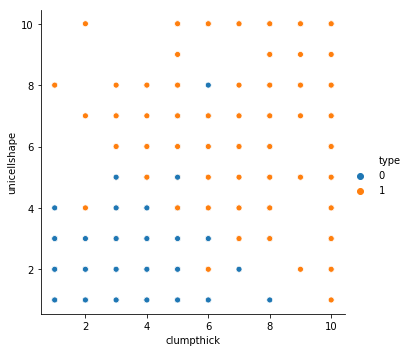

In [8]:
sns.relplot(x='clumpthick',y='unicellshape',data=df,hue='type')

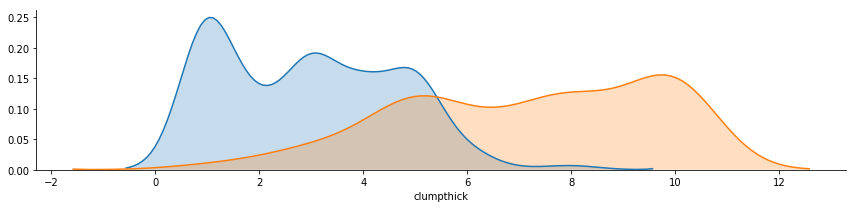

In [9]:
fig = sns.FacetGrid(data =df, hue='type',aspect=4)
fig.map(sns.kdeplot,'clumpthick',shade=True)

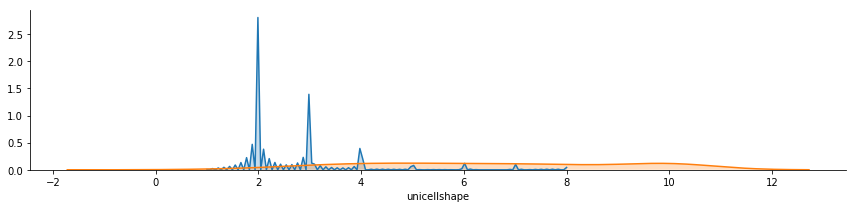

In [10]:
fig = sns.FacetGrid(data =df, hue='type',aspect=4)
fig.map(sns.kdeplot,'unicellshape',shade=True)

In [11]:
df.head(2)

,clumpthick,unicellshape,type
0,5,4,0
1,3,1,0


In [12]:
# Building Logistics Regression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [13]:
model = smf.glm(formula='type~clumpthick+unicellshape',data=df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   type   No. Observations:                  698
Model:                            GLM   Df Residuals:                      695
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.061922
Method:                          IRLS   Log-Likelihood:                -18.038
Date:                Fri, 22 Mar 2019   Deviance:                       43.036
Time:                        22:44:56   Pearson chi2:                     43.0
No. Iterations:                     3   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2046      0.018    -11.668      0.000      -0.239      -0.170
clumpthick       0.0533      0.004     12.035 

In [14]:
model.null_deviance

157.7893982808023

## Logistic Regression 
$ 0 = -0.2046 + 0.0533 * clumpthick + 0.0980* unicellshape $

In [15]:
model.params

Intercept      -0.204589
clumpthick      0.053282
unicellshape    0.097963
dtype: float64

In [16]:
df.head(2)

,clumpthick,unicellshape,type
0,5,4,0
1,3,1,0


In [17]:
clumpthick = df['clumpthick'] # get data
unicellshape = df['unicellshape'] # get data
# 0.5 percetage probability
unicellshape = (-model.params['Intercept'] - model.params['clumpthick'] * clumpthick)/model.params['unicellshape']

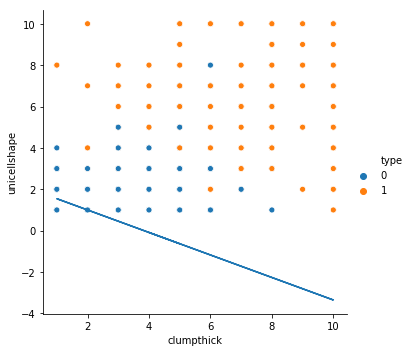

In [18]:
sns.relplot(x='clumpthick',y='unicellshape',data=df,hue='type')
plt.plot(clumpthick,unicellshape)

In [19]:
def prediction(x1,x2):
    clumpthick = x1
    unicellshape = x2
    lnor = model.params['Intercept'] + model.params['clumpthick'] * clumpthick + model.params['unicellshape']*unicellshape
    # convert into array
    oddsratio = np.exp(lnor)
    p = oddsratio/(oddsratio+1)
    return p

<Figure size 720x720 with 0 Axes>

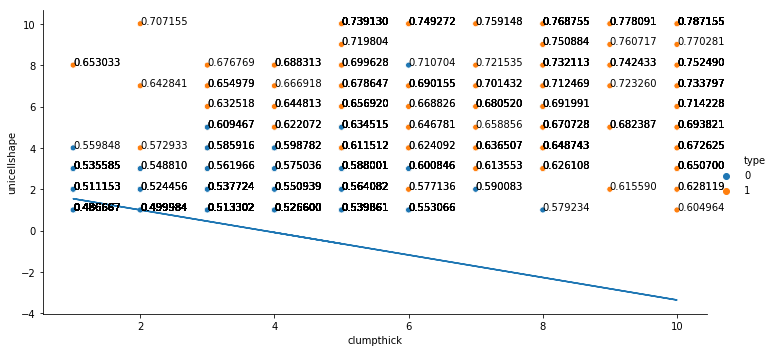

In [20]:
plt.figure(figsize=(10,10))
sns.relplot(x='clumpthick',y='unicellshape',data=df,hue='type',aspect=2)
plt.plot(clumpthick,unicellshape)
for i in range(len(df)):
    #print(i)
    plt.text(df['clumpthick'][i],df['unicellshape'][i],"%0.6f"%(prediction(df['clumpthick'][i],df['unicellshape'][i])))


0    457
1    241
Name: type, dtype: int64

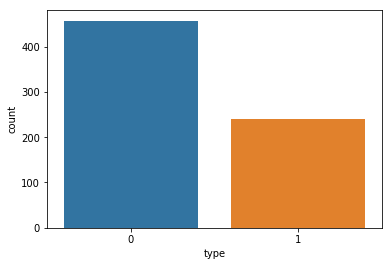

In [21]:
sns.countplot(x='type',data =df)
df['type'].value_counts()

In [38]:
def predict(prob,thresh=0.5):
    if prob > thresh:
        return 1
    else:
        return 0

In [39]:
y_pre_prob = prediction(df['clumpthick'],df['unicellshape'])

In [40]:
y_pred = y_pre_prob.apply(predict)

In [41]:
y_true = df['type']

## Confusion Matrix

In [42]:
from pandas_ml import ConfusionMatrix

In [43]:
# data
cm = ConfusionMatrix(y_true,y_pred)
cm

Predicted  False  True  __all__
Actual                         
False        163   294      457
True           0   241      241
__all__      163   535      698

In [44]:
cm.stats()

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:346: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


OrderedDict([('population', 698),
             ('P', 241),
             ('N', 457),
             ('PositiveTest', 535),
             ('NegativeTest', 163),
             ('TP', 241),
             ('TN', 163),
             ('FP', 294),
             ('FN', 0),
             ('TPR', 1.0),
             ('TNR', 0.35667396061269147),
             ('PPV', 0.4504672897196262),
             ('NPV', 1.0),
             ('FPR', 0.6433260393873085),
             ('FDR', 0.5495327102803739),
             ('FNR', 0.0),
             ('ACC', 0.5787965616045845),
             ('F1_score', 0.6211340206185567),
             ('MCC', 0.4008365656358759),
             ('informedness', 0.3566739606126914),
             ('markedness', 0.45046728971962624),
             ('prevalence', 0.3452722063037249),
             ('LRP', 1.554421768707483),
             ('LRN', 0.0),
             ('DOR', inf),
             ('FOR', 0.0)])

# ROC

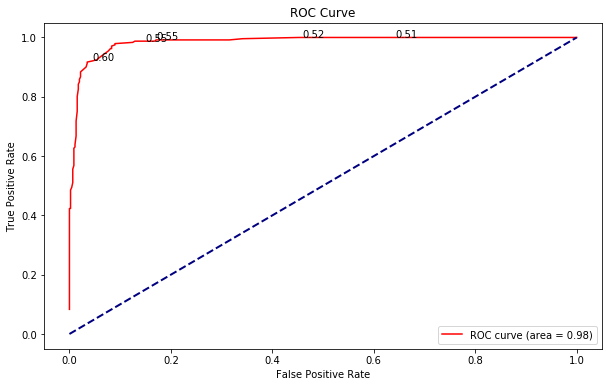

In [29]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_true,y_pre_prob)


plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

**From ROC: approximate threshold probabality value = 0.6**

Hence new logistic regression equation is 

### $ ln(\frac{0.6}{0.4}) = -0.2046 + 0.0533 * clumpthick + 0.0980* unicellshape $

In [30]:
from math import log

In [31]:
clumpthick = df['clumpthick'] # get data
unicellshape = df['unicellshape'] # get data
# 0.5 percetage probability
unicellshape = (log(0.6/0.4) -model.params['Intercept'] - model.params['clumpthick'] * clumpthick)/model.params['unicellshape']

<Figure size 720x720 with 0 Axes>

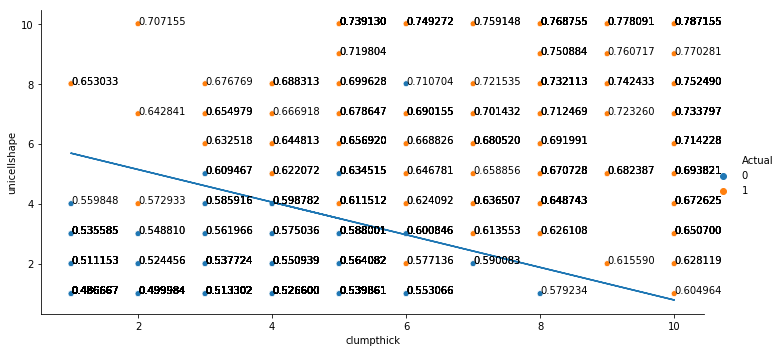

In [32]:
plt.figure(figsize=(10,10))
sns.relplot(x='clumpthick',y='unicellshape',data=df,hue='type',aspect=2)
plt.plot(clumpthick,unicellshape)
for i in range(len(df)):
    #print(i)
    plt.text(df['clumpthick'][i],df['unicellshape'][i],"%0.6f"%(prediction(df['clumpthick'][i],df['unicellshape'][i])))


In [33]:
y_pre_prob_new = prediction(df['clumpthick'],df['unicellshape'])

y_pred_new = y_pre_prob_new.apply(predict)


In [34]:
# data
cm_new = ConfusionMatrix(y_true,y_pred_new)
cm_new

Predicted  False  True  __all__
Actual                         
False        442    15      457
True          24   217      241
__all__      466   232      698

In [35]:
cm_new.stats()

OrderedDict([('population', 698),
             ('P', 241),
             ('N', 457),
             ('PositiveTest', 232),
             ('NegativeTest', 466),
             ('TP', 217),
             ('TN', 442),
             ('FP', 15),
             ('FN', 24),
             ('TPR', 0.9004149377593361),
             ('TNR', 0.9671772428884027),
             ('PPV', 0.9353448275862069),
             ('NPV', 0.9484978540772532),
             ('FPR', 0.03282275711159737),
             ('FDR', 0.06465517241379311),
             ('FNR', 0.0995850622406639),
             ('ACC', 0.9441260744985673),
             ('F1_score', 0.9175475687103594),
             ('MCC', 0.8756797357104631),
             ('informedness', 0.8675921806477387),
             ('markedness', 0.8838426816634599),
             ('prevalence', 0.3452722063037249),
             ('LRP', 27.43264177040111),
             ('LRN', 0.10296464580086741),
             ('DOR', 266.42777777777786),
             ('FOR', 0.05150214592274678

In [45]:
# With 0.5 Threshold
cm.stats_overall

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.5787965616045845),
             ('95% CI', (0.541181988866439, 0.6157422784488367)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9999999999999999),
             ('Kappa', 0.27685726166228525),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [37]:
# With 0.6 Threshold
cm_new.stats_overall

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.9441260744985673),
             ('95% CI', (0.9244069670030498, 0.9599701231100523)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 7.851173105857308e-71),
             ('Kappa', 0.8753171804149682),
             ("Mcnemar's Test P-Value", 'ToDo')])

# Good Job